In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files 

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"domnic","key":"a6b92b3c50381fc4a18657599a7b4b83"}'}

In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#!kaggle datasets list

In [ ]:
! kaggle datasets download -d 'columbine/imdb-dataset-sentiment-analysis-in-csv-format'

 35% 9.00M/25.7M [00:00<00:01, 11.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 33.4MB/s]


In [ ]:
!wget https://raw.githubusercontent.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k/master/train.xlsx
!wget https://raw.githubusercontent.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k/master/test.xlsx

In [ ]:
!ls -alh
!unzip imdb-dataset-sentiment-analysis-in-csv-format.zip
!ls

total 26M
drwxr-xr-x 1 root root 4.0K Mar 13 14:26 .
drwxr-xr-x 1 root root 4.0K Mar 13 14:20 ..
drwxr-xr-x 1 root root 4.0K Mar  9 14:47 .config
-rw-r--r-- 1 root root  26M Mar 13 14:26 imdb-dataset-sentiment-analysis-in-csv-format.zip
-rw-r--r-- 1 root root   62 Mar 13 14:26 kaggle.json
drwxr-xr-x 1 root root 4.0K Mar  9 14:48 sample_data
Archive:  imdb-dataset-sentiment-analysis-in-csv-format.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               
imdb-dataset-sentiment-analysis-in-csv-format.zip  sample_data	Train.csv
kaggle.json					   Test.csv	Valid.csv


In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('Train.csv')
df_tests = pd.read_csv('Test.csv')
df_valid = pd.read_csv('Valid.csv')

df_train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
print("Train : ", df_train.shape)
print("Test : ", df_tests.shape)
print("Valid : ", df_valid.shape)

Train :  (40000, 2)
Test :  (5000, 2)
Valid :  (5000, 2)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

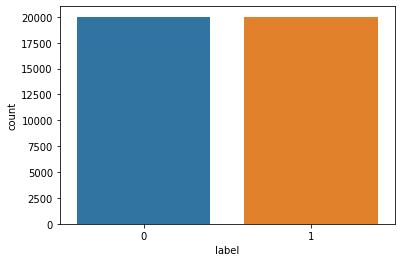

In [ ]:
sns.countplot(x="label",data=df_train)

#Check for missing data in the dataframes

In [ ]:
print("Train rows with empty cell: \n", df_train.isna().sum())
print("Test  rows with empty cell: \n", df_tests.isna().sum())
print("Valid rows with empty cell: \n", df_valid.isna().sum())

Train rows with empty cell: 
 text     0
label    0
dtype: int64
Test  rows with empty cell: 
 text     0
label    0
dtype: int64
Valid rows with empty cell: 
 text     0
label    0
dtype: int64


#Merge dataframe into a single dataframe.

In [ ]:
df = pd.concat([df_train, df_tests, df_valid], axis=0, ignore_index=True)
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
49995,"Man, I loved this movie! This really takes me ...",1
49996,Recovery is an incredibly moving piece of work...,1
49997,"You can take the crook out of the joint, but i...",1
49998,FUTZ is the only show preserved from the exper...,1


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from string import punctuation
import unicodedata

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words("english"))

In [ ]:
def data_lemmatize(sentence):
    sentence = [WordNetLemmatizer().lemmatize(token) for token in sentence]
    sentence = [WordNetLemmatizer().lemmatize(token,pos='v') for token in sentence] #Lemmatization
    sentence = " ".join(sentence)
    return sentence

In [ ]:
def clean_data(sentence):
    sentence = re.sub("<[a-zA-Z0-9]+>", " ", sentence) #remove special chars
    sentence = re.sub("[0-9]+", "", sentence) #replace digits with nothing
    sentence = sentence.lower() #make all words into lower case
    sentence = unicodedata.normalize('NFKD', sentence).encode('ascii','ignore').decode('utf-8', 'ignore')
    sentence = re.sub("[.,#_%$&\"\'\/\(\):!]", "", sentence) #remove non aplpahnumeric
    words = sentence.split()
    words_filtered = [x for x in words if x not in stop] #reomve stop words
    sentence = " ".join(words_filtered)
    return sentence

In [ ]:
df['text'] = df['text'].apply(lambda input_sentence: clean_data(input_sentence))
df

,text,label
0,grew b watching loving thunderbirds mates scho...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
49995,man loved movie really takes back kid days tea...,1
49996,recovery incredibly moving piece work handling...,1
49997,take crook joint seems exceedingly difficult t...,1
49998,futz show preserved experimental theatre movem...,1


In [ ]:
import gensim
from gensim import corpora, models, similarities, downloader

In [ ]:
all_words = df['text'].apply(gensim.utils.simple_preprocess)
all_words

0        [grew, watching, loving, thunderbirds, mates, ...
1        [put, movie, dvd, player, sat, coke, chips, ex...
2        [people, know, particular, time, past, like, f...
3        [even, though, great, interest, biblical, movi...
4        [im, die, hard, dads, army, fan, nothing, ever...
                               ...                        
49995    [man, loved, movie, really, takes, back, kid, ...
49996    [recovery, incredibly, moving, piece, work, ha...
49997    [take, crook, joint, seems, exceedingly, diffi...
49998    [futz, show, preserved, experimental, theatre,...
49999    [mother, tells, recently, widowed, mid, mother...
Name: text, Length: 50000, dtype: object

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(window=10, min_count=3, workers=8)

In [ ]:
model.build_vocab(all_words,progress_per=1000)

In [ ]:
model.epochs

5

In [ ]:
model.corpus_count

50000

In [ ]:
model.train(all_words, total_examples=model.corpus_count, epochs=model.epochs)

(29182777, 31491295)

In [ ]:
model.save("gensim_w2v_movie_review.model")

In [ ]:
model.wv.most_similar("fun")

[('entertaining', 0.665305495262146),
 ('enjoyable', 0.6569850444793701),
 ('enjoy', 0.5516719818115234),
 ('campy', 0.5336780548095703),
 ('thrill', 0.527904212474823),
 ('laughs', 0.5188045501708984),
 ('goofy', 0.5103409886360168),
 ('entertainment', 0.5069758892059326),
 ('harmless', 0.5024660229682922),
 ('laugh', 0.5017799735069275)]

In [ ]:
model.wv.most_similar("people")

[('folks', 0.6483582258224487),
 ('persons', 0.6424866914749146),
 ('peoples', 0.6200804114341736),
 ('person', 0.5367855429649353),
 ('qualifications', 0.5259573459625244),
 ('mistakes', 0.524242639541626),
 ('cause', 0.521948516368866),
 ('opinions', 0.5216593742370605),
 ('christians', 0.5138303637504578),
 ('idiots', 0.5125206112861633)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
#from sklearn.models import Li

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
X.shape

(50000, 134948)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=0)

In [ ]:
print("X_Train size ", x_train.shape)
print("X_Test size ", x_test.shape)
print("y_Train size ", y_train.shape)
print("y_Test size ", y_test.shape)

X_Train size  (40000, 134948)
X_Test size  (10000, 134948)
y_Train size  (40000,)
y_Test size  (10000,)


In [ ]:
model_svm = SVC()
model_rfc = RandomForestClassifier()
model_nb = BernoulliNB()

In [ ]:
model_svm.fit(x_train, y_train)
model_rfc.fit(x_train, y_train)
model_nb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
print("Support Vector Accuracy ", model_svm.score(x_test,y_test))
print("Bernouli Naive Accuracy ", model_nb.score(x_test,y_test))
print("Random Forest Accuracy ", model_rfc.score(x_test,y_test))

Support Vector Accuracy  0.8787
Bernouli Naive Accuracy  0.853
Random Forest Accuracy  0.8573


In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier()

In [ ]:
print("XGBoost Accuracy ", model_xgb.score(x_test,y_test))

XGBoost Accuracy  0.802


In [ ]:
predicted = model_rfc.predict(x_test)
predicted

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
pd.crosstab(y_test, predicted, margins=True)

col_0,0,1,All
label,,,
0,4341,716,5057
1,711,4232,4943
All,5052,4948,10000


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predicted)

array([[4341,  716],
       [ 711, 4232]])

In [ ]:
x_test.shape

(10000, 134948)

In [ ]:
review_111 = model_rfc.predict(x_test[111])
review_111

array([1])